# Mean_Reversion_Analysis
**Author**: Hansen Han  
**Date**: August 21st, 2023  
  

#### Load Libraries

In [7]:
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import warnings
import statistics 
import numpy as np
from matplotlib import rcParams
from concurrent.futures import ProcessPoolExecutor
from datetime import datetime


rcParams['figure.figsize'] = 15,8

warnings.filterwarnings('ignore')

#### Load Data

In [2]:
from crypto_backtesting import get_bitcoin_data
crypto_df = get_bitcoin_data(years=[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])
crypto_df


,timestamp,open,high,low,close,volume,Datetime,quarter
0,2014-01-01 00:00:00,739.2800,739.2800,739.2800,739.2800,1.500000e-01,2014-01-01 00:00:00,1
1,2014-01-01 01:00:00,742.9989,742.9989,742.9989,742.9989,3.720000e+00,2014-01-01 01:00:00,1
2,2014-01-01 02:00:00,748.4900,748.8900,748.4900,748.8900,5.740000e+00,2014-01-01 02:00:00,1
3,2014-01-01 03:00:00,740.0000,743.1000,740.0000,740.0000,2.256364e+00,2014-01-01 03:00:00,1
4,2014-01-01 04:00:00,745.3100,745.3100,745.3100,745.3100,1.745600e+00,2014-01-01 04:00:00,1
...,...,...,...,...,...,...,...,...
80036,2023-02-17 20:00:00,24523.0000,25023.0000,24523.0000,24834.0000,1.012941e+07,2023-02-17 20:00:00,37
80037,2023-02-17 21:00:00,24833.0000,24841.0000,24426.0000,24495.0000,4.186570e+06,2023-02-17 21:00:00,37
80038,2023-02-17 22:00:00,24479.0000,24745.0000,24057.0000,24692.0000,5.983257e+06,2023-02-17 22:00:00,37
80039,2023-02-17 23:00:00,24687.0000,24745.0000,24525.0000,24582.0000,1.484912e+06,2023-02-17 23:00:00,37


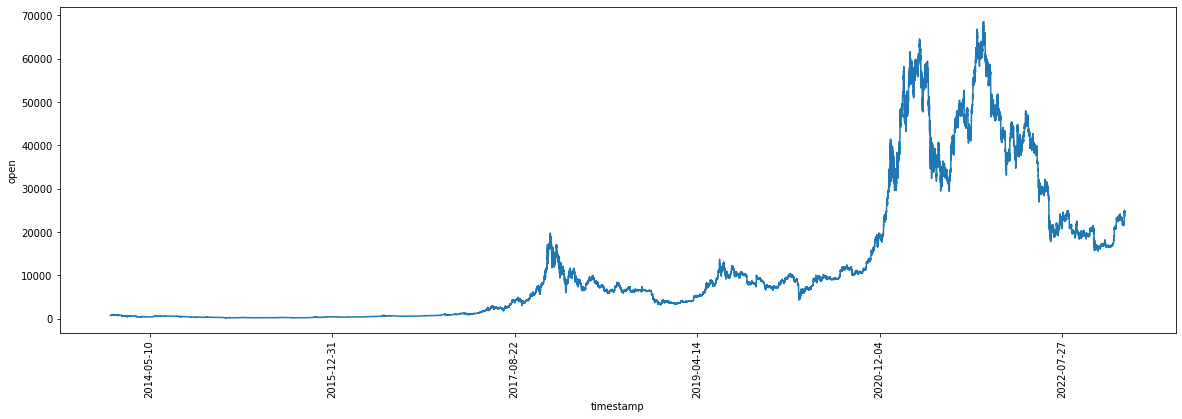

In [3]:
# View the data to make sure it looks right 
plt.figure(figsize=(20,6))
ax = sns.lineplot(x="timestamp", y="open", 
            data=crypto_df, ci=None)
ax.xaxis.set_major_locator(ticker.MaxNLocator(7))
plt.xticks(rotation="vertical")

plt.show() # looks right...

In [ ]:
crypto_df['price'] = crypto_df['open'] # set open to be the price to use 

#### Mean Reversion Backtesting

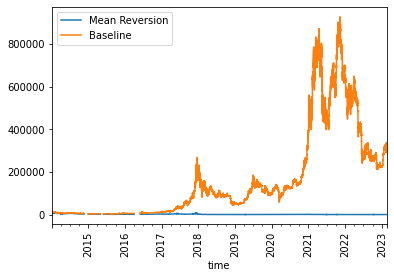

Hit Rate: 0.0
Mean Reversion Return Rate: -99.37 %
Buy & Hold Return Rate: 3224.86 %
Median Return per Quarter: -0.09 %


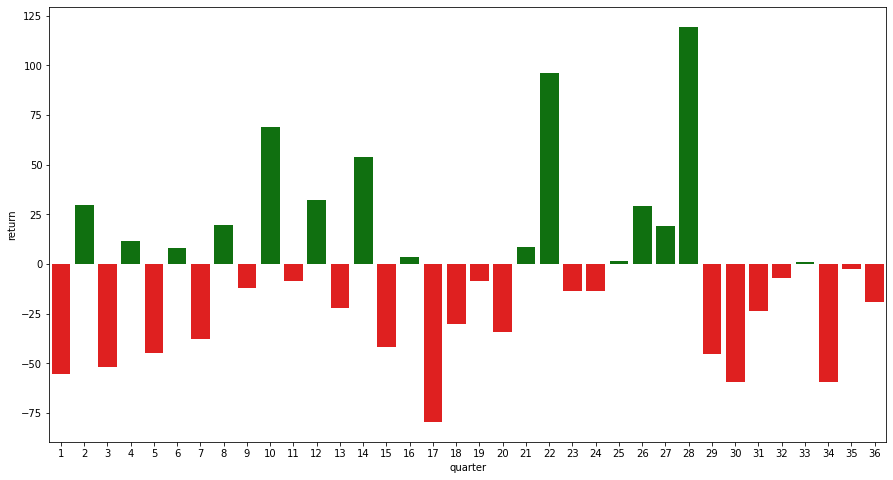

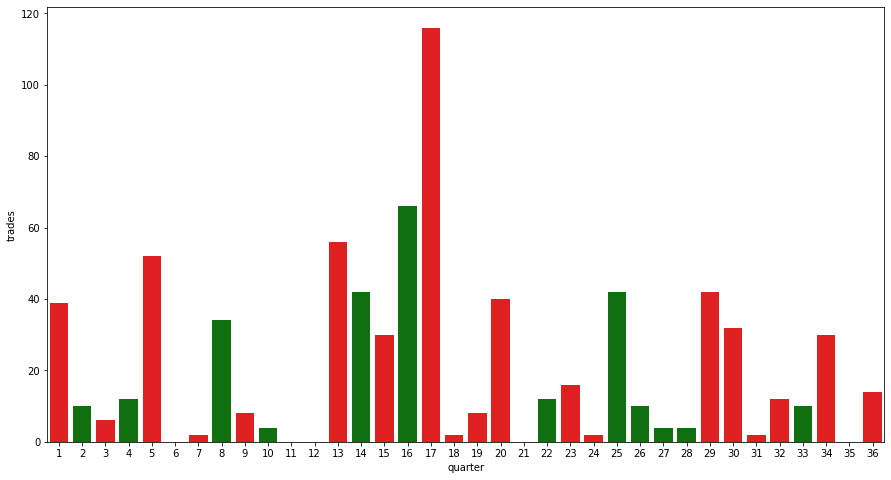

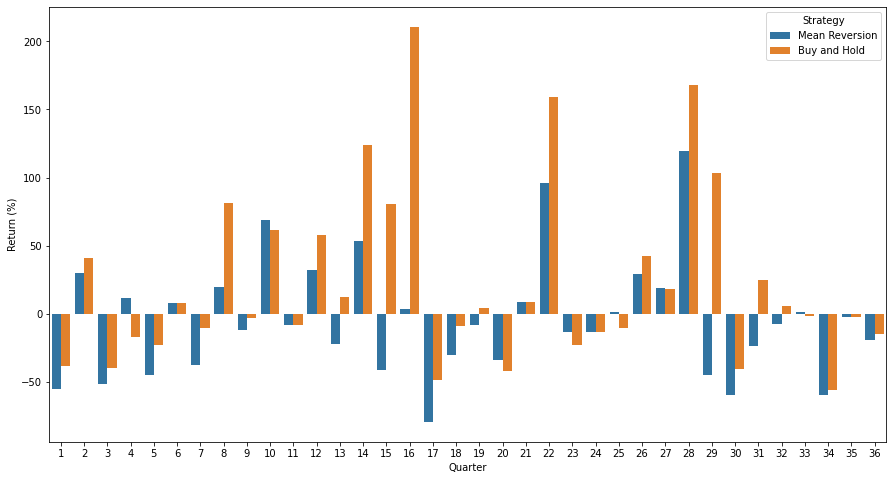

In [5]:
# run a single run to see how it works....
from crypto_backtesting import mean_reversion_backtester, plot_quarterly_data
import statistics

backtest_results = mean_reversion_backtester(
            sampled_data = crypto_df,
            order_sizing = 1,
            ma_length = 48,
            buy_threshold = 0.05,
            take_profit=0.1,
            stop_loss=0.1, 
            starting_capital = 10000,
            shorting_allowed=True,
            fixed_fee=False,
            fee = 0.005,
            display_results=True,
            record_balance=True,
            show_moving_averages = False,
            annual_taxes = True,
            tax_percentage = 0.3
        )

#Interpret backtest results
print("Hit Rate:", backtest_results['hit_rate'])
print("Mean Reversion Return Rate:", round(backtest_results['final_return_rate']*100,2), "%")
print("Buy & Hold Return Rate:", round(backtest_results['baseline_return_rate']*100,2), "%")
print("Median Return per Quarter:", round(statistics.median(backtest_results['quarter_return_rates']*100), 2), "%")

plot_quarterly_data(backtest_results)

### What are the optimal parameters for a mean reversion strategy? 

In [25]:
from crypto_backtesting import run_multiple_backtests

result_df = run_multiple_backtests(
    shorting_allowed = False,
    num_runs = 24,
    fixed_fee = False,
    crypto_df = crypto_df,
    strategy = "mean reversion"
)

result_df

,ma_length,stop_loss,buy_threshold,take_profit,cumulative_return,cumulative_baseline_return,profitable_quarters,total_trades,quarters_beating_baseline_results,strategy_quarterly_stdev,baseline_quarterly_stdev
0,819,0.91,0.38,0.86,0.916254,32.248566,8,1,0.22,0.404545,0.643615
1,686,0.74,0.59,0.88,0.000000,32.248566,0,0,0.50,0.000000,0.643615
2,127,0.49,0.46,0.84,0.000000,32.248566,0,0,0.50,0.000000,0.643615
3,1019,0.27,0.90,0.34,0.000000,32.248566,0,0,0.50,0.000000,0.643615
4,725,0.84,0.63,0.41,0.000000,32.248566,0,0,0.50,0.000000,0.643615
5,865,0.16,0.52,0.96,0.130719,32.248566,1,2,0.50,0.032320,0.643615
6,473,0.16,0.13,0.81,-0.999991,32.248566,14,2717,0.00,0.609911,0.643615
7,400,0.02,0.69,0.13,0.000000,32.248566,0,0,0.50,0.000000,0.643615
8,302,0.43,0.28,0.38,2.455967,32.248566,12,7,0.17,0.526565,0.643615
9,164,0.96,0.09,0.93,12.035317,32.248566,17,1,0.03,0.541018,0.643615


In [15]:
# Run all the combinations we want to look at 
today = datetime.now()
todays_date = today.strftime("%Y-%m-%d")

combo_1_results = run_multiple_backtests(shorting_allowed=True, num_runs=100, fixed_fee=True)
combo_1_results.to_csv("run_output/mean_reversion_shorting_no_fee_{todays_date}.csv".format(todays_date=todays_date))

combo_2_results = run_multiple_backtests(shorting_allowed=True, num_runs=100, fixed_fee=False)
combo_2_results.to_csv("run_output/mean_reversion_shorting_with_fee_{todays_date}.csv".format(todays_date=todays_date))

combo_3_results = run_multiple_backtests(shorting_allowed=False, num_runs=100, fixed_fee=True)
combo_3_results.to_csv("run_output/mean_reversion_no_shorting_no_fee_{todays_date}.csv".format(todays_date=todays_date))

combo_4_results = run_multiple_backtests(shorting_allowed=False, num_runs=100, fixed_fee=False)
combo_4_results.to_csv("run_output/mean_reversion_no_shorting_with_fee_{todays_date}.csv".format(todays_date=todays_date))

100%|██████████| 100/100 [26:38<00:00, 15.98s/it]
